In [345]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정
import matplotlib.font_manager as fm
path = '/Users/namhunkim/fonts/nanum-gothic/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=12)

# 데이터 불러오기

In [339]:
# channel_total

url1 = '/Users/namhunkim/Library/CloudStorage/OneDrive-연세대학교(YonseiUniversity)/DSL/EDA/data/main/channel_total.csv'
df1 = pd.read_csv(url1,lineterminator='\n')
df1.head(1)

,channelId,video_time,video_id,when,title,minute_time,seconds_time,open,totalview,subscriber
0,UCu9BCtGIEr73LXZsKmoujKw,4:58,u6lyUnhaaqk,10일 전,.,4.966667,298.0,2014-08-25,2.683340e+09,3230000.0


In [340]:
# youtube_nodouble_unique

url2 = '/Users/namhunkim/Library/CloudStorage/OneDrive-연세대학교(YonseiUniversity)/DSL/EDA/data/main/youtube_nodouble_unique.csv'
df2 = pd.read_csv(url2,lineterminator='\n')
df2.head(1)

,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,description,category_name,tag_num,period,Unnamed: 0,comments_disabled,ratings_disabled
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09 09:32:48,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,2020-08-18 00:00:00,보겸|bokyem,6879571,53705,115494,128860,NaN,Entertainment,2,7,950.0,False,False


In [341]:
# youtube_nodouble

url3 = '/Users/namhunkim/Library/CloudStorage/OneDrive-연세대학교(YonseiUniversity)/DSL/EDA/data/main/youtube_nodouble.csv'
df3 = pd.read_csv(url3,lineterminator='\n')
df3.head(1)

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category_name,tag_num
0,0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09 09:32:48,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,2020-08-12 00:00:00,보겸|bokyem,5947503,53326,105756,139946,False,False,NaN,Entertainment,2


# 1. 인기동영상들의 제목, 채널명, description, 태그의 갯수; 길이

std :22.98
mean :44.16
median :41.00
mode :40.00
--------------------
std :6.41
mean :10.21
median :9.00
mode :3.00
--------------------
std :473.74
mean :393.53
median :270.00
mode :0.00
--------------------
std :19.26
mean :18.96
median :13.00
mode :0.00
--------------------


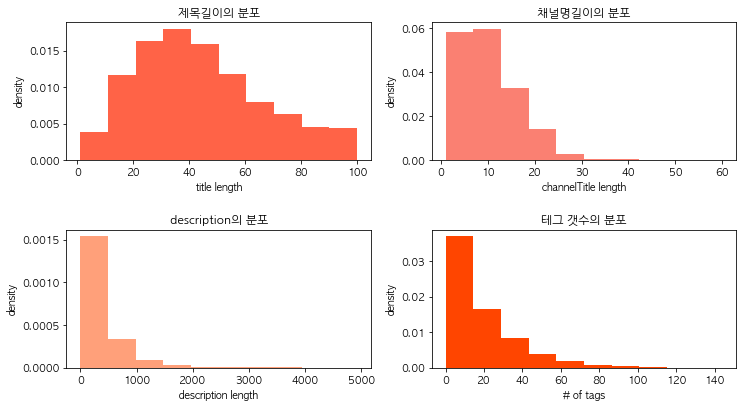

In [377]:
fig = plt.figure(figsize=(12,6))

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)

# 제목 길이의 분포
data1 = df3.title.apply(lambda x:len(x))
ax1 = fig.add_subplot(2, 2, 1)
ax1.set_xlabel('title length')
ax1.set_ylabel('density')
ax1.set_title('제목길이의 분포', fontproperties=fontprop)
ax1.hist(data1 ,bins=10, color='tomato', density=True)

# 주요 지표
print('std :%1.2f'%data1.std())
print('mean :%1.2f'%data1.mean())
print('median :%1.2f'%data1.median())
print('mode :%1.2f'%data1.mode())
print('-'*20)



# 채널명 길이의 분포
data2 = df3.channelTitle.apply(lambda x:len(x))
ax2 = fig.add_subplot(2, 2, 2)
ax2.set_xlabel('channelTitle length')
ax2.set_ylabel('density')
ax2.set_title('채널명길이의 분포', fontproperties=fontprop)
ax2.hist(data2 ,bins=10, color='salmon', density=True)

# 주요 지표
print('std :%1.2f'%data2.std())
print('mean :%1.2f'%data2.mean())
print('median :%1.2f'%data2.median())
print('mode :%1.2f'%data2.mode())
print('-'*20)



# description 길이의 분포
data3 = df3.description.apply(lambda x:len(x) if x==x else 0)
ax3 = fig.add_subplot(2, 2, 3)
ax3.set_xlabel('description length')
ax3.set_ylabel('density')
ax3.set_title('description의 분포', fontproperties=fontprop)
ax3.hist(data3 ,bins=10, color='lightsalmon', density=True)

# 주요 지표
print('std :%1.2f'%data3.std())
print('mean :%1.2f'%data3.mean())
print('median :%1.2f'%data3.median())
print('mode :%1.2f'%data3.mode())
print('-'*20)



# tag 갯수의 분포
data4 = df3.tag_num
ax4 = fig.add_subplot(2, 2, 4)
ax4.set_xlabel('# of tags')
ax4.set_ylabel('density')
ax4.set_title('테그 갯수의 분포', fontproperties=fontprop)
ax4.hist(data4 ,bins=10, color='orangered', density=True)

# 주요 지표
print('std :%1.2f'%data4.std())
print('mean :%1.2f'%data4.mean())
print('median :%1.2f'%data4.median())
print('mode :%1.2f'%data4.mode())
print('-'*20)

# 2. 인기동영상들의 제목, 채널명, 태그의 갯수; 영어

In [50]:
word = df3.title[4]
word.upper() != word.lower()

True

In [147]:
# 인기동영상에 영어가 포함된 영상의 비율이 어느정도 되는가?

data = df3.title.apply(lambda x: 1 if (x.upper() != x.lower()) else 0)
print('제목 : %1.2f%%'%(data.sum() / data.count() * 100))
data = df3.channelTitle.apply(lambda x: 1 if (x.upper() != x.lower()) else 0)
print('채널명 : %1.2f%%'%(data.sum() / data.count() * 100))
data = df3.tags.apply(lambda x: 1 if (x.upper() != x.lower()) else 0)
print('테그 : %1.2f%%'%(data.sum() / data.count() * 100))

제목 : 59.73%
채널명 : 67.96%
테그 : 78.07%


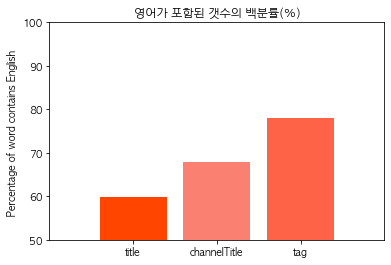

In [373]:
data1 = df3.title.apply(lambda x: 1 if (x.upper() != x.lower()) else 0)
data2 = df3.channelTitle.apply(lambda x: 1 if (x.upper() != x.lower()) else 0)
data3 = df3.tags.apply(lambda x: 1 if (x.upper() != x.lower()) else 0)

index = [0,1,2]
heights = [np.around((data1.sum() / data1.count() * 100),2), np.around((data2.sum() / data2.count() * 100),2),
          np.around((data3.sum() / data3.count() * 100),2)]

plt.bar(index,heights, color=['orangered','salmon','tomato'])
plt.axis([-1,3,50,100])
plt.ylabel('Percentage of word contains English ')
plt.title('영어가 포함된 갯수의 백분률(%)', fontproperties=fontprop)
plt.xticks(index, labels=['title','channelTitle','tag'])
plt.show()

([<matplotlib.axis.XTick at 0x7f7883eb8550>,
 [Text(0, 0, 'title'), Text(1, 0, 'channelTitle'), Text(2, 0, 'tag')])

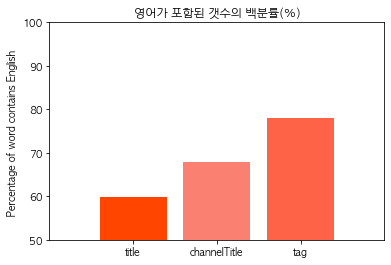

In [370]:
plt.bar(index,heights, color=['orangered','salmon','tomato'])
plt.axis([-1,3,50,100])
plt.ylabel('Percentage of word contains English ')
plt.title('영어가 포함된 갯수의 백분률(%)', fontproperties=fontprop)
plt.xticks(index, labels=['title','channelTitle','tag'])

In [371]:
# 글자의 95%가 영어이면 1, 아니면 0을 반환하는 함수

def isAllEng(text):
    count = 0
    i = 0
    while(i<len(text)):
        x = text[i]
        if ('a' <= x <= "z" or 'A' <= x <='Z'):
            count += 1
        i += 1
    
    result = 0
    if count/len(text)*100 > 95:
        result = 1
    
    return result

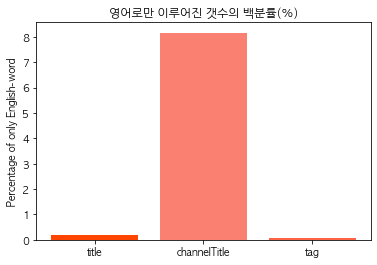

In [376]:
data1 = df3.title.apply(lambda x: isAllEng(x))
data2 = df3.channelTitle.apply(lambda x: isAllEng(x))
data3 = df3.tags.apply(lambda x:  isAllEng(x))

index = [0,1,2]
heights = [np.around((data1.sum() / data1.count() * 100),2), np.around((data2.sum() / data2.count() * 100),2),
          np.around((data3.sum() / data3.count() * 100),2)]

plt.bar(index,heights, color=['orangered','salmon','tomato'])
# plt.axis([-1,3,50,100])
plt.ylabel('Percentage of only English-word')
plt.title('영어로만 이루어진 갯수의 백분률(%)', fontproperties=fontprop)
plt.xticks(index, labels=['title','channelTitle','tag'])
plt.show()